In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ease_of_live_scripts as es
from sympy import *
from scipy import optimize as fit
from pprint import *
import seaborn as sbs
sbs.set()

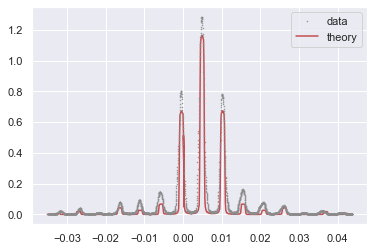

s:0.0005706150260206035
A:4.184985756434743
z:0.8404798789430529
d:3.9736736171749734e-05
wl:6.332016435415973e-07
L:9.994032286487274e-05
n:9.999943352078985
offset:0.004934551042157292
R^2:0.8389596766557046


In [68]:
pname=['s', 'A', 'z', 'd', 'wl', 'L', 'n', 'offset']
z=0.84
d=4.0e-5
L=10.0e-5
A=4
wl=(6.328*(10**(-7)))
n=10
offset=+0.005
s=0.0005
def model_integrate(xdata,model,s,*args):
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        ydata[i]=np.average(model(np.linspace(xdata[i]-s,xdata[i]+s,1000),*args))
    return ydata
def newmodel(x,s,*args):
    return model_integrate(x,es.n_slits_model,s,*args)

data=es.read('exp1125/original parameters/10 lines per millimiters','sweep2.txt')
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle'])))) #x data agusted for distortion
ydata=-data['power']
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata,ydata,[s, A, z, d, wl, L, n, offset],
                         bounds=((0     ,0     ,z-0.001*z,d-0.01*d,wl-wl*0.001,L-L*0.01,n-n/2,-np.inf),
                                 (5    ,np.inf,z+0.001*z,d+0.01*d,wl+wl*0.001,L+L*0.01,n+n/2,np.inf)))
plt.plot(xdata,newmodel(xdata,popt[0],*popt[1:]),zorder=1,color=sbs.color_palette()[3])
# plt.plot(xdata,newmodel(xdata,s,*[A, z, d, wl, L, n, offset]),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,newmodel,popt)))

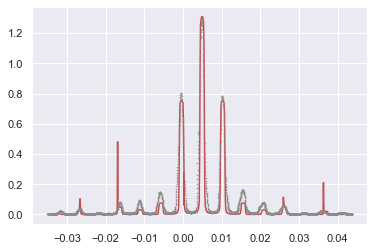

In [78]:
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])

s=0.0005806150260206035
A=4.784985756434743
z=0.8404798789430529
d=3.9736736171749734e-05
wl=6.332016435415973e-07
L=9.994032286487274e-05
n=9.999943352078985
offset=0.004934551042157292
plt.plot(xdata,newmodel(xdata,s,*[A, z, d, wl, L, n, offset]),zorder=1,color=sbs.color_palette()[3])
plt.show()